In [1]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUIDATA')

'/home/cusp/nm2565/PUIdata'

In [3]:
os.system('curl -O https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv')
os.system('mv rows.csv ' + os.getenv('PUIDATA'))

0

In [ ]:
#https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip

In [4]:
nrg = gp.GeoDataFrame.from_csv(os.getenv('PUIDATA') + '/' + 'rows.csv')

In [5]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [ ]:
#http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip

In [6]:
os.system("curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip")
os.system("mv mn_mappluto_16v1.zip " + os.getenv("PUIDATA"))

0

In [7]:
os.system("unzip " + os.getenv('PUIDATA') + '/' + "mn_mappluto_16v1.zip")

256

In [8]:
bsize = gp.GeoDataFrame.from_file('MNMapPLUTO.shp')

In [9]:
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [10]:
nrg.columns

Index(['NYC Borough, Block, and Lot (BBL)', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'],
      dtype='object')

In [11]:
bsize.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a12ffe7b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0a127a4c50>]], dtype=object)

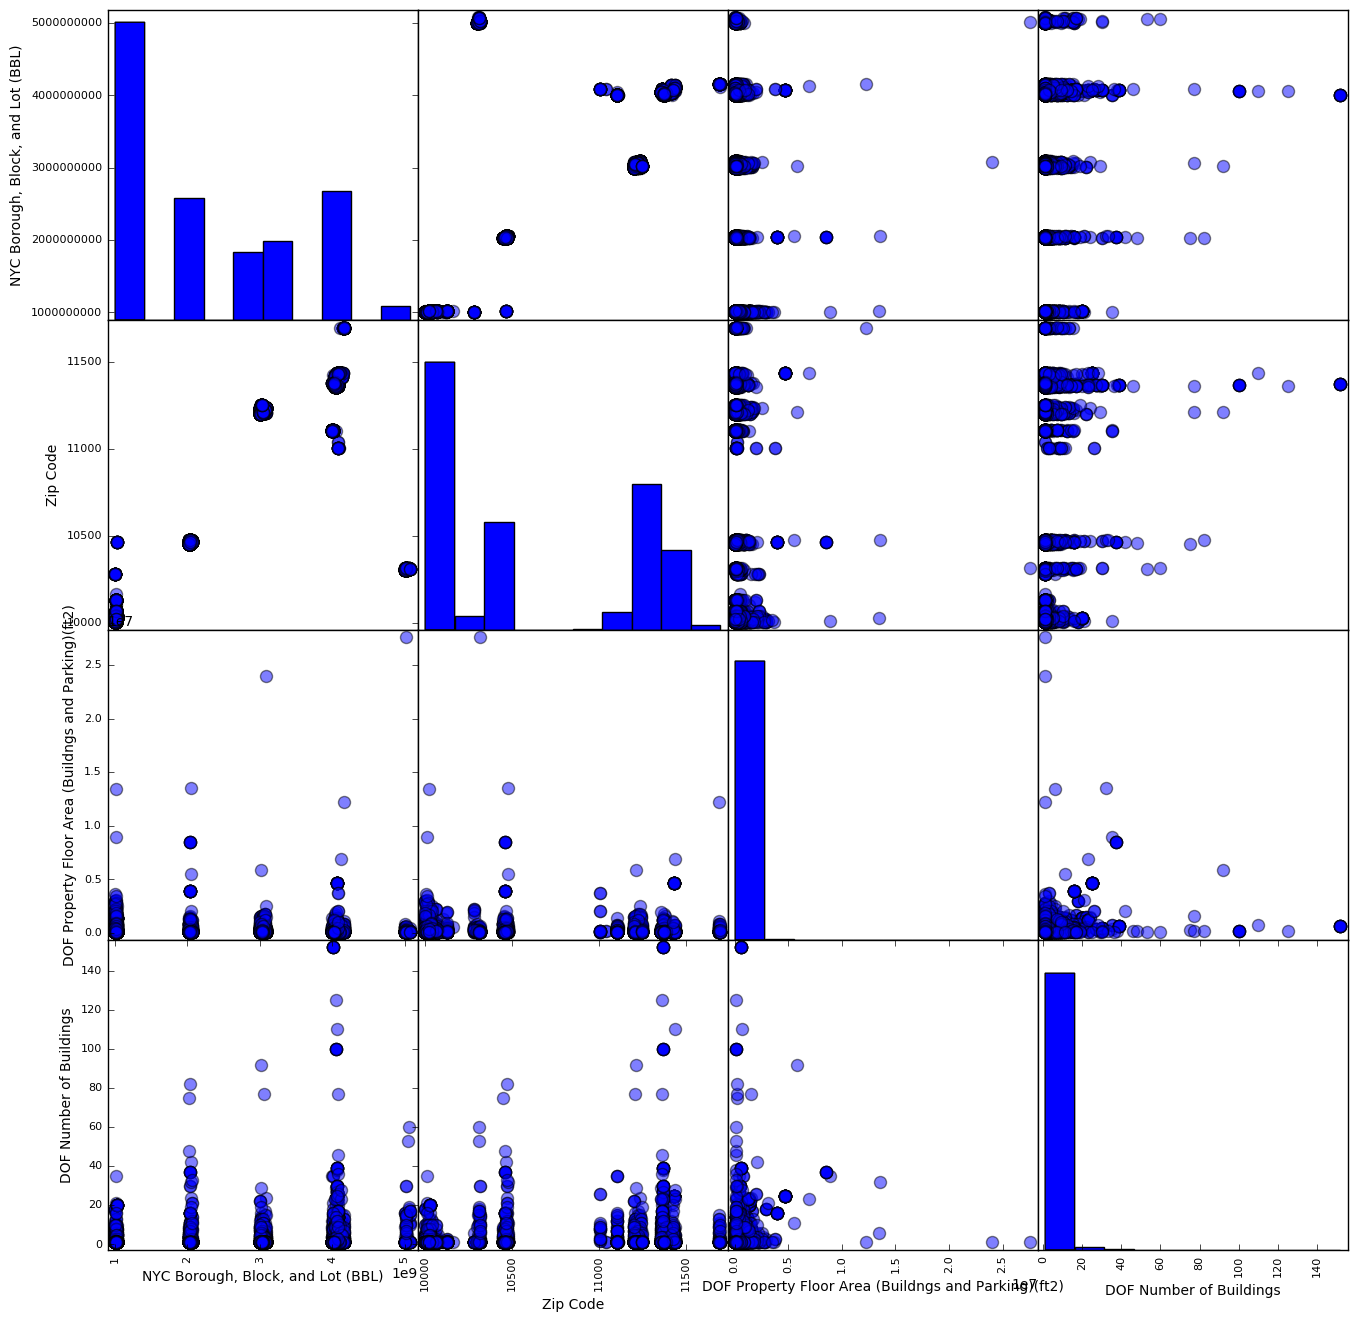

In [12]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))


In [14]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

In [15]:
converted = (np.vectorize(canconvert)(nrg['Reported Property Floor Area (Building(s)) (ft²)']))
print ("invalid entries changed to NaN %d"%sum(converted))
nrg['Reported Property Floor Area (Building(s)) (ft²)'][~converted] = float('NaN')

invalid entries changed to NaN 15430


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [16]:
indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
print ("invalid entries changed to NaN %d"%sum(indx))
nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')

invalid entries changed to NaN 15513


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [17]:
nrg.drop(['Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status', 'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'], axis = 1, inplace = True)

In [18]:
nrg['total_energy'] = nrg['Site EUI(kBtu/ft2)'].astype(float) * nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
nrg.astype(float)

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),total_energy
Record Number,,,,
12086,1.000410e+09,NaN,918919.0,NaN
14354,4.021460e+09,NaN,NaN,NaN
12150,2.027620e+09,NaN,64200.0,NaN
12590,1.006700e+09,NaN,NaN,NaN
15591,2.048300e+09,NaN,50000.0,NaN
12135,2.006120e+09,NaN,61800.0,NaN
8523,3.050770e+09,NaN,102198.0,NaN
15920,3.065710e+09,NaN,46620.0,NaN
14241,4.004490e+09,NaN,NaN,NaN


In [20]:
#nrg.drop(['Value'], axis = 1, inplace = True)

In [21]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),total_energy
Record Number,,,,
12086,1.000410e+09,NaN,918919,NaN
14354,4.021460e+09,NaN,NaN,NaN
12150,2.027620e+09,NaN,64200,NaN
12590,1.006700e+09,NaN,NaN,NaN
15591,2.048300e+09,NaN,50000,NaN


In [22]:
bsize.drop(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'Version', 'XCoord', 'YCoord',
       'YearAlter1', 'YearAlter2', 'YearBuilt', 'ZMCode', 'ZipCode',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'ZoneMap',
       'geometry'], axis = 1, inplace = True)

In [23]:
bsize.head()

,BBL,UnitsRes,UnitsTotal
0,1.015450e+09,16,18
1,1.007238e+09,50,50
2,1.016800e+09,10,10
3,1.013850e+09,29,32
4,1.011970e+09,26,26


In [24]:
nrg_ren = nrg.rename(columns ={'NYC Borough, Block, and Lot (BBL)':'BBL'})
nrg_ren.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),total_energy
Record Number,,,,
12086,1.000410e+09,NaN,918919,NaN
14354,4.021460e+09,NaN,NaN,NaN
12150,2.027620e+09,NaN,64200,NaN
12590,1.006700e+09,NaN,NaN,NaN
15591,2.048300e+09,NaN,50000,NaN


In [25]:
bblnrgdata = pd.merge(nrg_ren, bsize)
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),total_energy,UnitsRes,UnitsTotal
0,1.006700e+09,NaN,NaN,NaN,0,1
1,1.004370e+09,NaN,NaN,NaN,0,4
2,1.013110e+09,125.4,330000,41382000.0,0,56
3,1.009220e+09,NaN,NaN,NaN,148,148
4,1.007400e+09,NaN,68329,NaN,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a1267d978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f0a122955c0>]], dtype=object)

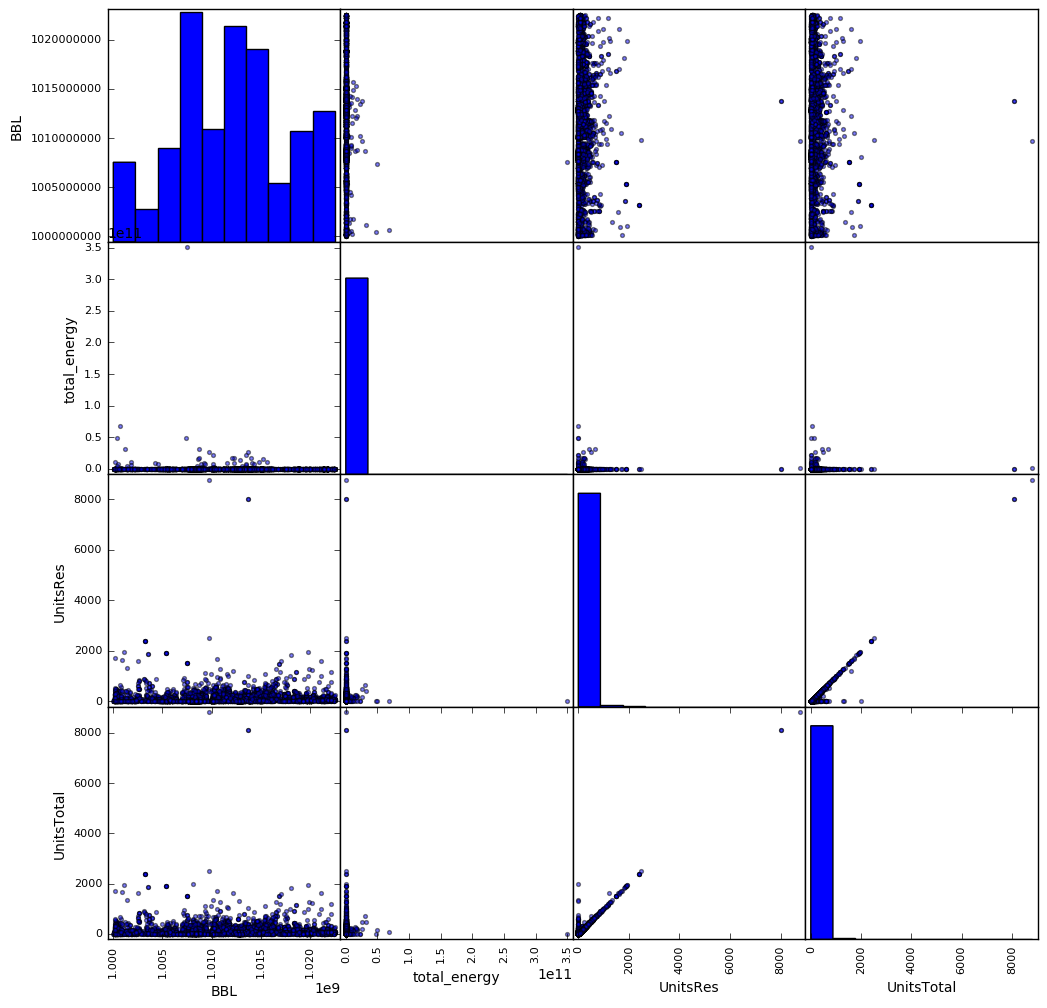

In [26]:
scatter_matrix (bblnrgdata, s=30, figsize=(12, 12))

In [27]:
bblnrgdata.convert_objects(convert_numeric = True).dtypes

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


BBL                                                 float64
Site EUI(kBtu/ft2)                                  float64
Reported Property Floor Area (Building(s)) (ft²)    float64
total_energy                                        float64
UnitsRes                                              int64
UnitsTotal                                            int64
dtype: object

In [ ]:
#nrg['total_energy'] = nrg['Site EUI(kBtu/ft2)'].astype(float) * nrg['Reported Property Floor Area (Building(s)) (ft²)'].astype(float)
#nrg.astype(float)

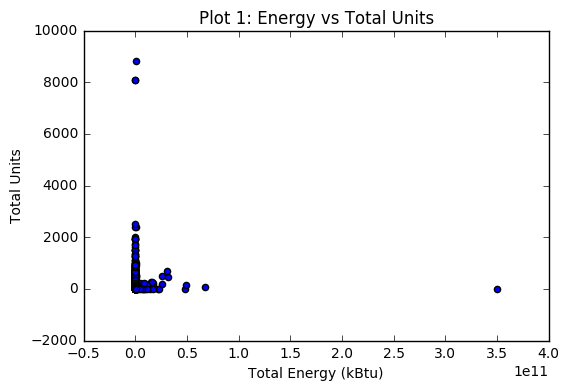

In [28]:
bblnrgdata.plot(x = 'total_energy', y = 'UnitsTotal', kind = 'scatter')
plt.title('Plot 1: Energy vs Total Units')
#plt.text(1910, -100000, 'Relationship between year of birth and CitiBike trip duration.', fontsize = 12)
plt.xlabel('Total Energy (kBtu)')
plt.ylabel('Total Units')

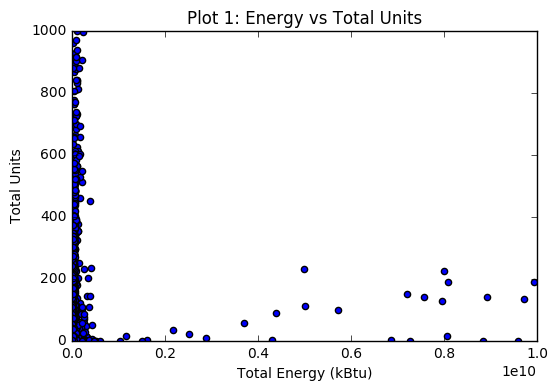

In [29]:
bblnrgdata.plot(x = 'total_energy', y = 'UnitsTotal', kind = 'scatter')
plt.title('Plot 1: Energy vs Total Units')
#plt.text(1910, -100000, 'Relationship between year of birth and CitiBike trip duration.', fontsize = 12)
plt.xlim(1000,1e10)
plt.ylim(1,1000)
plt.xlabel('Total Energy (kBtu)')
plt.ylabel('Total Units')

In [31]:
bblnrgdata_cut = bblnrgdata[bblnrgdata['total_energy']>1000]
bblnrgdata_cut = bblnrgdata[bblnrgdata['UnitsTotal']<1000]
bblnrgdata_cut = bblnrgdata[bblnrgdata['UnitsTotal']>2]

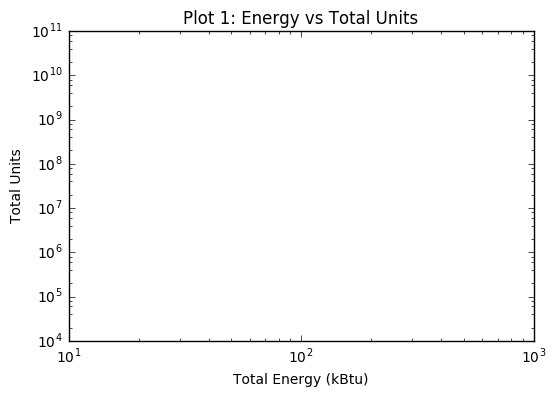

In [36]:
bblnrgdata_cut.plot(x = 'total_energy', y = 'UnitsTotal', kind = 'scatter', loglog = True)
plt.title('Plot 1: Energy vs Total Units')
#plt.text(1910, -100000, 'Relationship between year of birth and CitiBike trip duration.', fontsize = 12)
plt.xlim(10,1000)
plt.ylim(10000,100000000000)
plt.xlabel('Total Energy (kBtu)')
plt.ylabel('Total Units')